# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

np.random.seed(42)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=550)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=550)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

299

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# cities

In [4]:
# Create base url to scan API
url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial"
base_url = f"{url}&appid={weather_api_key}"

In [5]:
# Create parameters
# cities = cities[0:10]
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [6]:
# Create a for loop to go through each city. 
# Include a try/except so code doesn't break.

for city in cities:
    my_city_url = base_url + '&q=' + city
#     print(my_city_url)

    try:
        response = requests.get(my_city_url).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        time.sleep(0.5)
        
    except (KeyError, ValueError):
        # Append null values
#         print("Missing field...skipping.")
        pass
    
# print(response)

In [7]:
# Create a dataframe from the cities, lat, temp, humidity, cloudiness, and wind speed.
city_weather_df = pd.DataFrame({"City": city_name,
                                "City Latitude": lat,
                                "City Longitude": lng,
                                "Max Temperature": max_temp,
                                "Humidity": humidity,
                                "Cloud Coverage": cloudiness,
                                "Wind Speed": wind_speed,
                                "City Country": country,
                                "City Datetime": date
                               })


city_weather_df

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Henties Bay,-22.1160,14.2845,69.01,84,34,12.84,NA,1613413207
1,Tiksi,71.6872,128.8694,-7.22,91,100,9.28,RU,1613413208
2,Ulcinj,41.9294,19.2244,41.00,38,0,10.36,ME,1613412982
3,Faya,18.3851,42.4509,62.60,82,0,3.44,SA,1613413209
4,New Norfolk,-42.7826,147.0587,55.99,78,95,1.48,AU,1613413210
...,...,...,...,...,...,...,...,...,...
267,Salalah,17.0151,54.0924,75.20,57,0,2.30,OM,1613413384
268,Tamiahua,21.2667,-97.4500,48.25,80,100,17.45,MX,1613413385
269,Caborca,30.5838,-111.1010,59.00,40,92,4.00,MX,1613413385
270,Sungai Besar,3.6746,100.9867,77.00,94,20,2.77,MY,1613413386


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Export the city data into a .csv
city_weather_df.to_csv("City_Weather.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

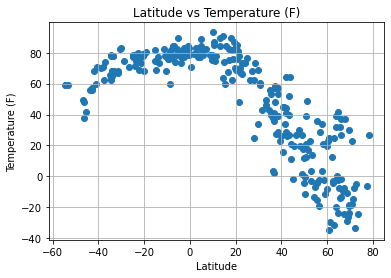

In [9]:
# Build a scatter plot for Latitude vs Temperature (F)
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

The "Latitude vs Temperature" scatter plot compares the latitude with the temperature of hundreds of cities around the world.

## Latitude vs. Humidity Plot

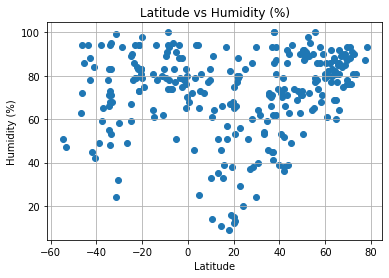

In [10]:
# Build a scatter plot for Latitude vs Humidity 
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

The "Latitude vs Humidity" scatter plot compares the latitude with the humidity of hundreds of cities around the world.

## Latitude vs. Cloudiness Plot

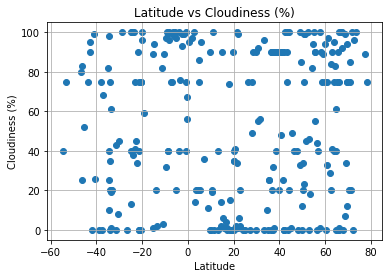

In [11]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Cloud Coverage"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

The "Latitude vs Cloudiness" scatter plot compares the latitude with the cloudiness in hundreds of cities around the world.

## Latitude vs. Wind Speed Plot

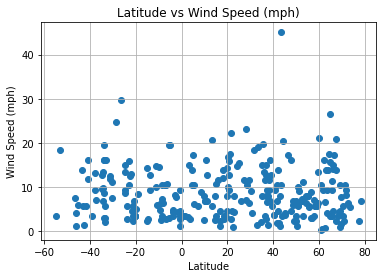

In [12]:
# Build a scatter plot for Latitude vs Wind Speed (mph)
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


The "Latitude vs Wind Speed" scatter plot compares the latitude with the wind speed in hundreds of cities around the world.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
city_weather_df["Humidity"].max()


100

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_weather_df.dropna(inplace=True)
city_weather_df.reset_index(drop=True, inplace=True)
city_weather_df

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Henties Bay,-22.1160,14.2845,69.01,84,34,12.84,NA,1613413207
1,Tiksi,71.6872,128.8694,-7.22,91,100,9.28,RU,1613413208
2,Ulcinj,41.9294,19.2244,41.00,38,0,10.36,ME,1613412982
3,Faya,18.3851,42.4509,62.60,82,0,3.44,SA,1613413209
4,New Norfolk,-42.7826,147.0587,55.99,78,95,1.48,AU,1613413210
...,...,...,...,...,...,...,...,...,...
267,Salalah,17.0151,54.0924,75.20,57,0,2.30,OM,1613413384
268,Tamiahua,21.2667,-97.4500,48.25,80,100,17.45,MX,1613413385
269,Caborca,30.5838,-111.1010,59.00,40,92,4.00,MX,1613413385
270,Sungai Besar,3.6746,100.9867,77.00,94,20,2.77,MY,1613413386


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_max_temp = northern_lats["Max Temperature"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_max_temp)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)


1     -10.955096
2      33.905687
3      69.399431
7      -1.753283
8      66.738791
         ...    
267    71.464747
268    65.055332
269    51.009522
270    91.575954
271    23.472824
Name: City Latitude, Length: 180, dtype: float64


In [16]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.51x +97.12


The r-value is 0.7627905833610004


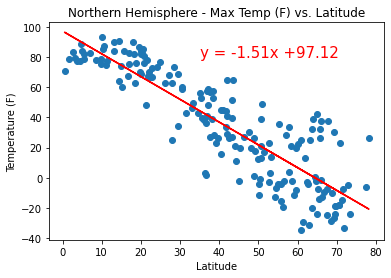

In [17]:
# Create plot
plt.scatter(north_latitude, north_max_temp)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(35, 80),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_max_temp = southern_lats["Max Temperature"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_max_temp)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      73.205299
4      63.248028
5      65.551200
6      72.721422
12     73.646632
         ...    
249    68.716177
259    78.514597
261    80.497369
262    76.482729
264    79.560018
Name: City Latitude, Length: 92, dtype: float64


In [19]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.48x +83.86


The r-value is 0.5113607729881674


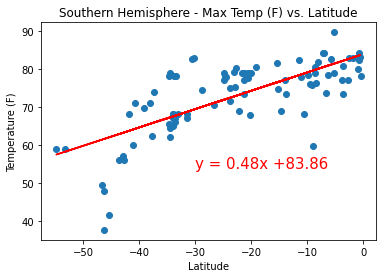

In [20]:
# Create plot
plt.scatter(south_latitude, south_max_temp)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(-30, 54),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_humidity = northern_lats["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_humidity)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

1      84.660935
2      70.393150
3      59.104513
7      81.734337
8      59.950718
         ...    
267    58.447648
268    60.486136
269    64.953347
270    52.051362
271    73.711279
Name: City Latitude, Length: 180, dtype: float64


In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.48x +50.29


The r-value is 0.22145491418599145


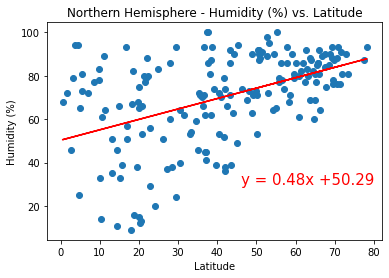

In [23]:
# Create plot
plt.scatter(north_latitude, north_humidity)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(46, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_humidity = southern_lats["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_humidity)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      76.226686
4      69.355654
5      70.944962
6      75.892786
12     76.531228
         ...    
249    73.128960
259    79.890376
261    81.258591
262    78.488282
264    80.611770
Name: City Latitude, Length: 92, dtype: float64


In [25]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.33x +83.58


The r-value is 0.08943799362734649


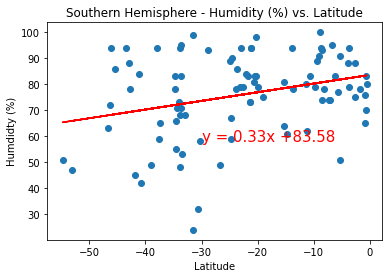

In [26]:
# Create plot
plt.scatter(south_latitude, south_humidity)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humdidty (%)')
plt.annotate(line_eq,(-30, 58),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_cloudiness = northern_lats["Cloud Coverage"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_cloudiness)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

1      62.307177
2      49.322405
3      39.048884
7      59.643750
8      39.818995
         ...    
267    38.451086
268    40.306266
269    44.371769
270    32.629979
271    52.342155
Name: City Latitude, Length: 180, dtype: float64


In [28]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.44x +31.03


The r-value is 0.05417670243727938


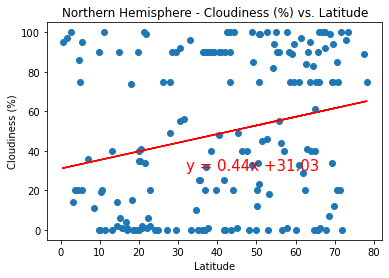

In [29]:
# Create plot
plt.scatter(north_latitude, north_cloudiness)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(32, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [40]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_cloudiness = southern_lats["Cloud Coverage"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_cloudiness)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      57.406907
4      42.866815
5      46.230019
6      56.700327
12     58.051364
         ...    
249    50.851673
259    65.159804
261    68.055144
262    62.192771
264    66.686378
Name: City Latitude, Length: 92, dtype: float64


In [41]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.7x +72.97


The r-value is 0.07847063467488717


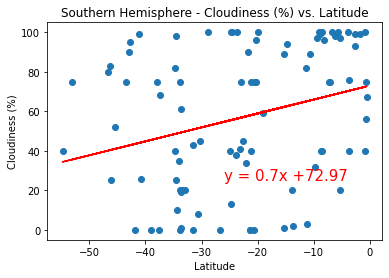

In [42]:
# Create plot
plt.scatter(south_latitude, south_cloudiness)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-26, 25),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_wind_speed = northern_lats["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_wind_speed)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

1      7.947256
2      8.546184
3      9.020055
7      8.070108
8      8.984533
         ...   
267    9.047629
268    8.962058
269    8.774535
270    9.316130
271    8.406897
Name: City Latitude, Length: 180, dtype: float64


In [34]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.02x +9.39


The r-value is 0.004702606383179471


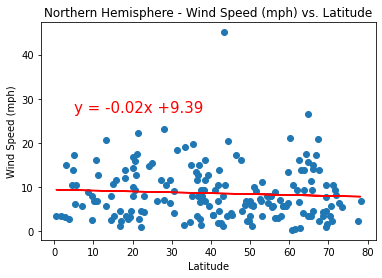

In [35]:
# Create plot
plt.scatter(north_latitude, north_wind_speed)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5, 27),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [36]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_wind_speed = southern_lats["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_wind_speed)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

0      8.520085
4      9.760688
5      9.473730
6      8.580373
12     8.465098
         ...   
249    9.079397
259    7.858586
261    7.611547
262    8.111741
264    7.728334
Name: City Latitude, Length: 92, dtype: float64


In [37]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.06x +7.19


The r-value is 0.023420252415611992


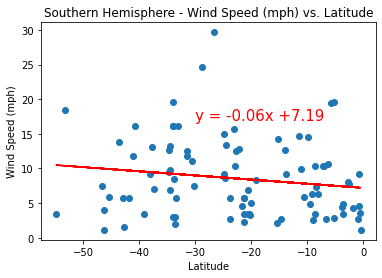

In [38]:
# Create plot
plt.scatter(south_latitude, south_wind_speed)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-30, 17),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()